In [3]:
#!wget -nc https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls

In [6]:
import pandas as pd
import numpy as np
np.set_printoptions(formatter={'all':lambda x: '%6.2f' % x})

df = pd.read_excel('data.xls', skiprows=(1))
df = df.rename(columns={'default payment next month':'DEF', 'PAY_0':'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
minobs = min(df.value_counts('DEF').values)
df = df.groupby('DEF').sample(n=minobs, random_state=1).sample(frac=1, random_state=1)
df.iloc[:5,:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF
2231,2232,230000,2,1,2,49,2,2,-1,-1,...,0,2119,0,0,1100,0,2119,0,2916,1
6574,6575,200000,1,1,1,38,-2,-2,-2,-2,...,4115,1315,0,2658,0,4125,1315,0,0,0
13810,13811,40000,1,1,1,47,2,2,2,2,...,12595,14386,14005,2000,1000,0,2000,0,2000,0
7934,7935,180000,2,2,2,28,1,2,-1,-1,...,0,22357,21541,0,1600,0,22357,1500,785,1
7277,7278,150000,2,1,1,44,1,2,2,-1,...,10195,24232,22000,0,0,10195,24232,0,0,1


In [10]:
X = np.asarray(df.iloc[:,1:-1])
Xmax = X.max(0)
X = X / Xmax

Y = np.asarray(df['DEF'], dtype='int8')

In [13]:
n = 10
x = np.asarray(df[['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']][:n])
y = np.asarray(df[['DEF']][:n])[:,0]

In [14]:
hid = 5
U = np.random.random((hid, x.shape[1])) * 4 - 2
V = np.random.random((1,hid)) * 4 - 2
print(np.dot(U, x[0]))

[  6.64   4.52  -3.74  -0.19  -3.39]


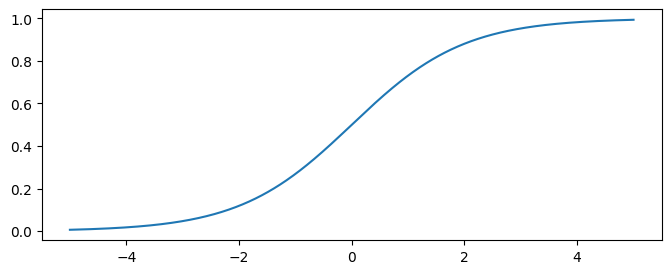

In [16]:
import matplotlib.pyplot as plt
a = np.linspace(-5, 5, 1000)
b = 1 / (1 + np.exp(-a) )
plt.figure(figsize=(8, 3))
plt.plot(a, b)

In [17]:
c = 1
e = 0
while c > 0.1:
    U = np.random.random((hid, x.shape[1])) * 4 - 2
    V = np.random.random((1,hid)) * 4 - 2
    h = 1/(1 + np.exp(-1 * np.dot(U, x.T)))
    o = 1/(1 + np.exp(-1 * np.dot(V, h)))
    c = np.sum((o-y)**2)/n
    e += 1
    
print('y:     ', np.asarray([y])*1.0)
print('o:     ', o)
print('sq.err:', (o-y)**2)
print('cost:  ', c)
print('epochs:', e)

y:      [[  1.00   0.00   0.00   1.00   1.00   0.00   0.00   1.00   0.00   0.00]]
o:      [[  0.82   0.26   0.16   0.92   0.87   0.21   0.26   0.21   0.21   0.25]]
sq.err: [[  0.03   0.07   0.03   0.01   0.02   0.04   0.07   0.63   0.04   0.06]]
cost:   0.09919030360505553
epochs: 108602
